In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [2]:
def filter_pvalue(df, pvalue_range):
    df = df[df['Pvalue'].apply(lambda x: x <= pvalue_range[0] or x >= pvalue_range[1])].copy()
    df['Target'] = df['Pvalue'].apply(lambda x: 1 if x < np.mean(pvalue_range) else 0)
    return df

In [3]:
def evaluate(train, test):
    model = SGDClassifier(loss='log', max_iter=100)
    model.fit(train[[col for col in train.columns if 'cause' in col or 'effect' in col]], train['Target'])
    y_pred = model.predict(test[[col for col in test.columns if 'cause' in col or 'effect' in col]])
    print(accuracy_score(test['Target'], y_pred))
    print(f1_score(test['Target'], y_pred))
    return f1_score(test['Target'], y_pred)

In [4]:
folds = os.listdir('Raw')

In [5]:
test = None
train = None
y_pred = None

In [8]:
scores = []
for test_fold in folds:
    print(f'Test fold: {test_fold}')
    test = pd.read_csv(f'Raw/{test_fold}', sep = ';')
    train = pd.DataFrame(columns = test.columns)
    for train_fold in [fold for fold in folds if fold != test_fold]:
        print(f'Train fold: {train_fold}')
        train = pd.concat((train, pd.read_csv(f'Raw/{train_fold}',sep = ';')))
    train = train.reset_index(drop=True)
    
    test = filter_pvalue(test, (0.01, 0.5))
    train = filter_pvalue(train, (0.01, 0.5))
    
    score = evaluate(train, test)
    print(f'Score: {score}')
    scores += score
    
    break

Test fold: CTNNB1.csv
Train fold: Erk.csv
Train fold: Ikk2.csv
Train fold: IRF4.csv
Train fold: Jnk.csv
Train fold: LEF1.csv
Train fold: MYC.csv
0.99926863161
0.0
Score: 0.0


/home/robert/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
train.shape, test.shape, 

((691542, 24), (82038, 24))

Text(0.5,1,'Test Pvalues')

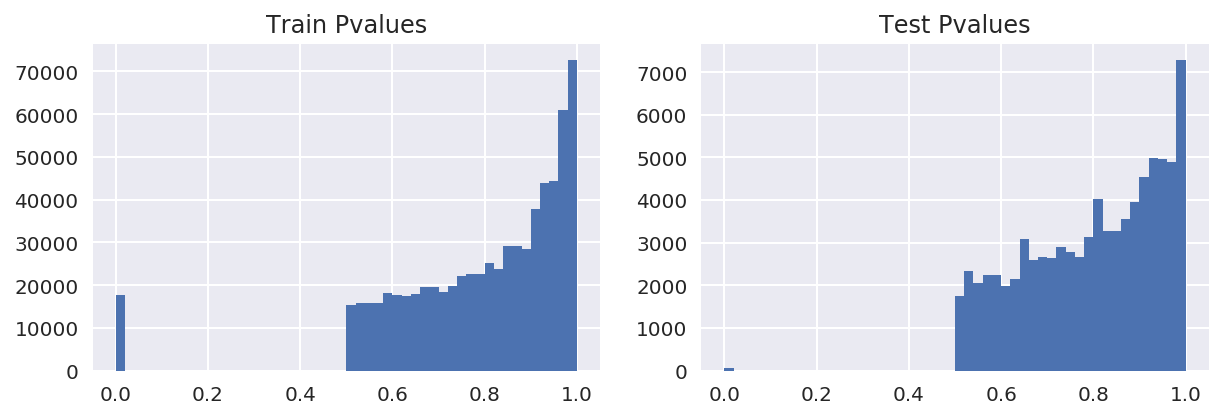

In [13]:
plt.subplots(ncols=2, figsize=(10,3))
plt.subplot(121)
ax = train['Pvalue'].hist(bins=50)
ax.set_title('Train Pvalues')
plt.subplot(122)
ax = test['Pvalue'].hist(bins=50)
ax.set_title('Test Pvalues')

In [48]:
def evaluate(train, test):
    model = SGDClassifier(loss='log', max_iter=100)
    model.fit(train[[col for col in train.columns if 'cause' in col or 'effect' in col]], train['Target'])
    y_pred = model.predict(test[[col for col in test.columns if 'cause' in col or 'effect' in col]])
    y_pred_proba = model.predict_proba(test[[col for col in test.columns if 'cause' in col or 'effect' in col]])[:,1]
    print('Accuracy: ', accuracy_score(test['Target'], y_pred))
    print('F1-Score: ', f1_score(test['Target'], y_pred))
    print('Logloss: ', log_loss(test['Target'], y_pred_proba))
    print('ROC-AUC: ', roc_auc_score(test['Target'], y_pred_proba))
    print('Confusion matrix: ')
    print(confusion_matrix(test['Target'], y_pred))
    return f1_score(test['Target'], y_pred)

In [49]:
f1 = evaluate(train, test)

Accuracy:  0.99926863161
F1-Score:  0.0
Logloss:  0.0286881779791
ROC-AUC:  0.470630331715
Confusion matrix: 


/home/robert/anaconda3/envs/kaggle/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[[81978     0]
 [   60     0]]


In [ ]:
def evaluate(train, test):
    model = SGDClassifier(loss='log', max_iter=500)
    model.fit(train[[col for col in train.columns if 'cause' in col or 'effect' in col]], train['Target'])
    y_pred = model.predict(test[[col for col in test.columns if 'cause' in col or 'effect' in col]])
    y_pred_proba = model.predict_proba(test[[col for col in test.columns if 'cause' in col or 'effect' in col]])[:,1]
    print('Accuracy: ', accuracy_score(test['Target'], y_pred))
    print('F1-Score: ', f1_score(test['Target'], y_pred))
    print('Logloss: ', log_loss(test['Target'], y_pred_proba))
    return f1_score(test['Target'], y_pred)

In [41]:
len(test[test['Target']==0]) / len(test)

0.9992686316097418

Text(0.5,1,'Test Pvalues')

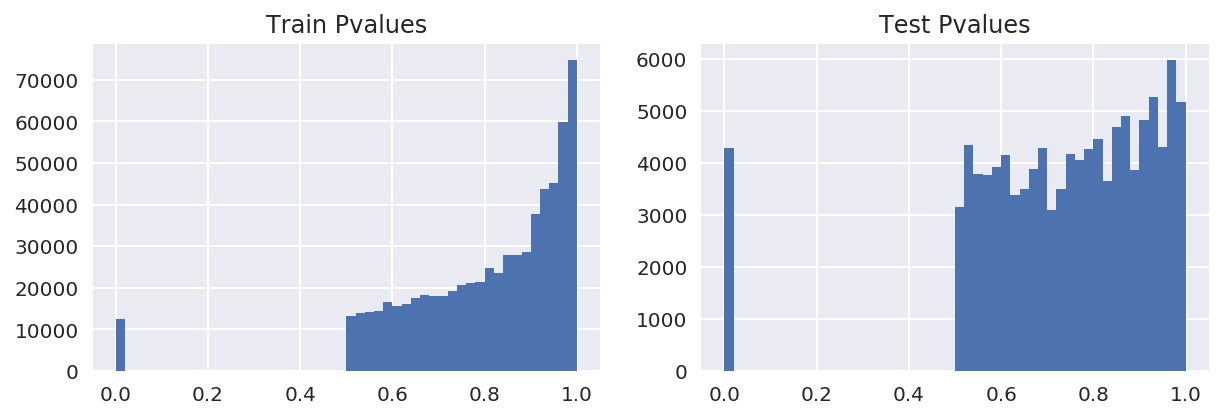

In [85]:
plt.subplots(ncols=2, figsize=(10,3))
plt.subplot(121)
ax = train['Pvalue'].hist(bins=50)
ax.set_title('Train Pvalues')
plt.subplot(122)
ax = test['Pvalue'].hist(bins=50)
ax.set_title('Test Pvalues')

Text(0.5,1,'Test Target')

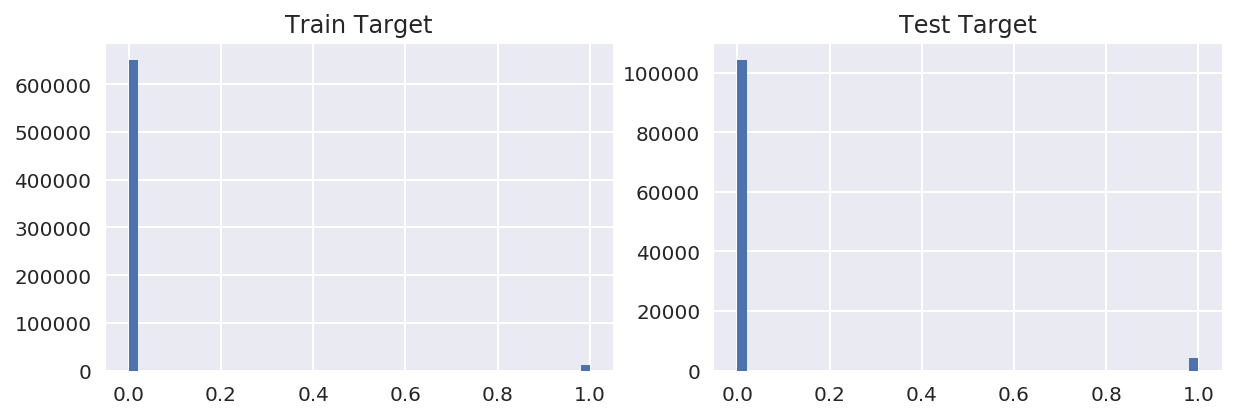

In [92]:
plt.subplots(ncols=2, figsize=(10,3))
plt.subplot(121)
ax = train['Target'].hist(bins=50)
ax.set_title('Train Target')
plt.subplot(122)
ax = test['Target'].hist(bins=50)
ax.set_title('Test Target')